In [ ]:
#genel resim
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
df = sns.load_dataset("titanic")
df.head()

def check_df(dataframe, head=5):
  print("*******shape********")
  print(dataframe.shape)
  print("*******types********")
  print(dataframe.dtypes)
  print("********head********")
  print(dataframe.head(head))
  print("********tail********")
  print(dataframe.tail(head))
  print("********NA**********")
  print(dataframe.isnull().sum())
  print("*****Quantiles*****")
  print(dataframe.describe([0,0.5,0.95,0.99,1]).T)
check_df(df)

*******shape********
(891, 15)
*******types********
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object
********head********
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    

In [ ]:
#oluşturduğumuz check_df i başka bir veri seti üstünde uygulayalım
df =sns.load_dataset("tips")
check_df(df)

*******shape********
(244, 7)
*******types********
total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object
********head********
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
********tail********
     total_bill   tip     sex smoker   day    time  size
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2
********NA**********
total_bill    0
tip           0
sex          

In [ ]:
#kategorik değişken analizi
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
df = sns.load_dataset("titanic")
df.head()

df["embarked"].value_counts()#tek bir değişkeni analiz etmek için kullanılır
df["sex"].unique()#array(['male', 'female'], dtype=object) eşsiz değerler
df["sex"].nunique()#kaç tane eşsizdeğer var , 2, male, female




2

In [ ]:
cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category","object", "bool"]]
cat_cols# tip bilgisi "category","object", "bool" olanları getirir

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [ ]:
df["sex"].dtypes#tipi nedir object çıktımız o olur
str(df["sex"].dtypes) in ["object"] # tipi object mi diye sorduk çıktı True olur

True

In [ ]:
#sütunlarda(col) gez tip bilgisine bak eğer tipi int veya float ise ve eşsiz sınıf sayısı(nunique)<10 dan bunları getir
num_bat_cat = [col for col in #sütunlarda gez
               df.columns if df[col].nunique() < 10 
               and df[col].dtype
               in ["int", "float"]]
num_bat_cat #çünkü bunlar sayısal olarak tanımlanmış kategorik değişkenler olabilir

['survived', 'pclass', 'sibsp', 'parch']

In [ ]:
#sütunlarda gez 
#değişkenin tipi "category", "object" ise 
#ve eşsiz sınıf sayısı 20 den fazla ise
#bu durumda ölçülebilir bir değişken olmayabilir bunları yakala ve getir
cat_but_car = [col for col in
               df.columns if df[col].nunique() > 20
               and str(df[col].dtype) 
               in ["category", "object"]]
cat_but_car#yokmuş boş liste gelir

[]

In [ ]:
cat_cols = cat_cols + num_bat_cat #kategorik olabilir düşüncesiyle hepsini birleştirdim
cat_cols

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone',
 'survived',
 'pclass',
 'sibsp',
 'parch',
 'survived',
 'pclass',
 'sibsp',
 'parch']

In [ ]:
#cat_but_car dan değişken gelseydi
cat_cols = [col for col in cat_cols if col not in cat_but_car] #işlemini uygulardık

In [ ]:
df[cat_cols]#kategorik değişkenleri yazdırdım

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone,survived,pclass,sibsp,parch,survived,pclass,sibsp,parch
0,male,S,Third,man,True,NaN,Southampton,no,False,0,3,1,0,0,3,1,0
1,female,C,First,woman,False,C,Cherbourg,yes,False,1,1,1,0,1,1,1,0
2,female,S,Third,woman,False,NaN,Southampton,yes,True,1,3,0,0,1,3,0,0
3,female,S,First,woman,False,C,Southampton,yes,False,1,1,1,0,1,1,1,0
4,male,S,Third,man,True,NaN,Southampton,no,True,0,3,0,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,male,S,Second,man,True,NaN,Southampton,no,True,0,2,0,0,0,2,0,0
887,female,S,First,woman,False,B,Southampton,yes,True,1,1,0,0,1,1,0,0
888,female,S,Third,woman,False,NaN,Southampton,no,False,0,3,1,2,0,3,1,2
889,male,C,First,man,True,C,Cherbourg,yes,True,1,1,0,0,1,1,0,0


In [ ]:
df[cat_cols].nunique()#kategorik değişkenlerin eşsiz sınıf sayısı kategorik saydıklarımız d doğ ru mu kontrol edelim

sex            2
embarked       3
class          3
who            3
adult_male     2
deck           7
embark_town    3
alive          2
alone          2
survived       2
pclass         3
sibsp          7
parch          7
survived       2
pclass         3
sibsp          7
parch          7
dtype: int64

In [ ]:
#seçtik şimdi bunlara fonksiyon yazalım
#hangi sınıftan kaçar tane var söylesin
#ilgili kategorik değişkenin sınıflarının oran bilgisine ulaşalım
#kısaca değişkeni özetlesin
def cat_summary (dataframe, col_name):
  print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                      "Ratio":100*dataframe[col_name].value_counts()/len(dataframe)}))
  print("#################################################################")
cat_summary(df, "sex")


        sex      Ratio
male    577  64.758698
female  314  35.241302
#################################################################


In [ ]:
#bütün kategorik değişkenlere yukarıdaki işlemi uygulayalım
for col in cat_cols:#sütunlarda gez
  cat_summary(df, col)#cat_summary i dataframedeki sütunların hepsine uygula

        sex      Ratio
male    577  64.758698
female  314  35.241302
#################################################################
   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
#################################################################
        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
#################################################################
       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
#################################################################
       adult_male     Ratio
True          537  60.26936
False         354  39.73064
#################################################################
   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
#################################################################
             embark_town   

        sex      Ratio
male    577  64.758698
female  314  35.241302
#################################################################


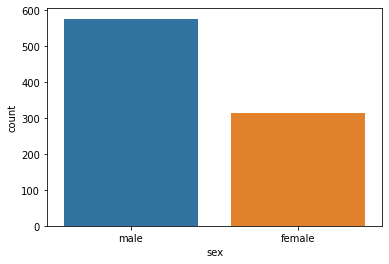

In [ ]:
#kategorik değişken analizi 2
#önceki uygulamaya grafik ekleyelim
def cat_summary (dataframe, col_name, plot=False):
  print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                      "Ratio":100*dataframe[col_name].value_counts()/len(dataframe)}))
  print("#################################################################")

  if plot:
    sns.countplot(x=dataframe[col_name], data=dataframe)
    plt.show(block=True)

cat_summary(df, "sex", plot=True)

        sex      Ratio
male    577  64.758698
female  314  35.241302
#################################################################


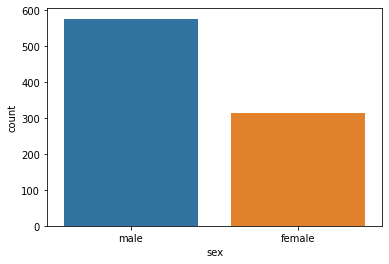

   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
#################################################################


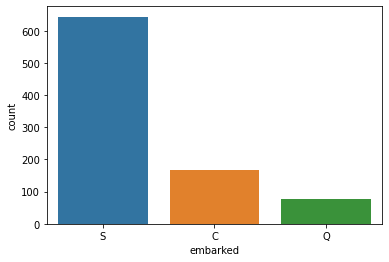

        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
#################################################################


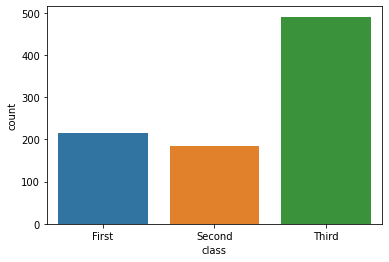

       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
#################################################################


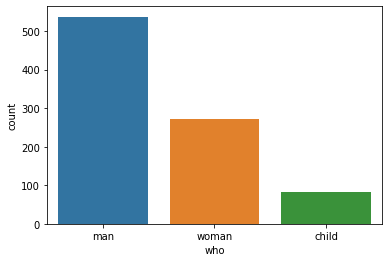

adult_male
   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
#################################################################


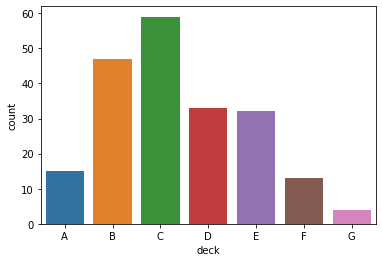

             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
#################################################################


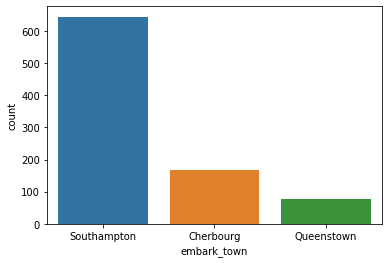

     alive      Ratio
no     549  61.616162
yes    342  38.383838
#################################################################


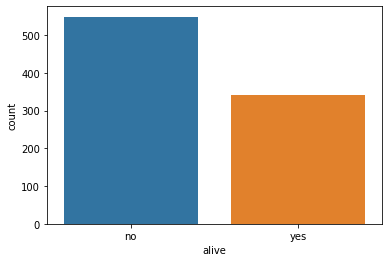

alone
   survived      Ratio
0       549  61.616162
1       342  38.383838
#################################################################


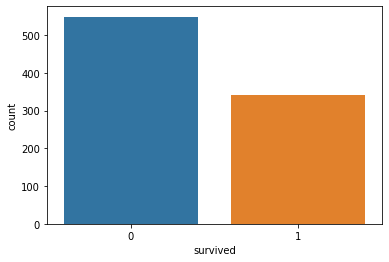

   pclass      Ratio
3     491  55.106622
1     216  24.242424
2     184  20.650954
#################################################################


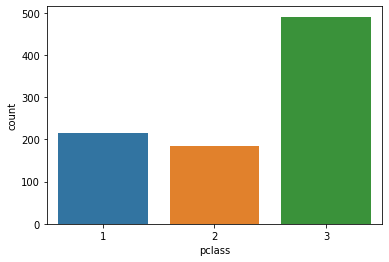

   sibsp      Ratio
0    608  68.237935
1    209  23.456790
2     28   3.142536
4     18   2.020202
3     16   1.795735
8      7   0.785634
5      5   0.561167
#################################################################


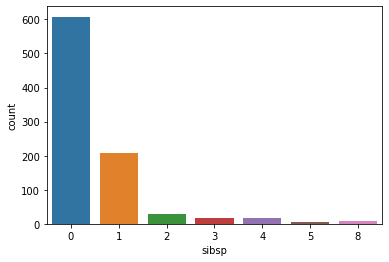

   parch      Ratio
0    678  76.094276
1    118  13.243547
2     80   8.978676
5      5   0.561167
3      5   0.561167
4      4   0.448934
6      1   0.112233
#################################################################


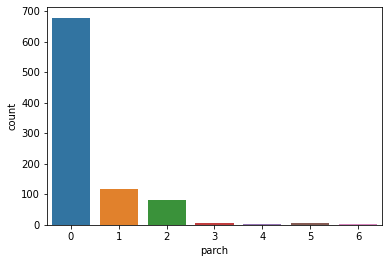

   survived      Ratio
0       549  61.616162
1       342  38.383838
#################################################################


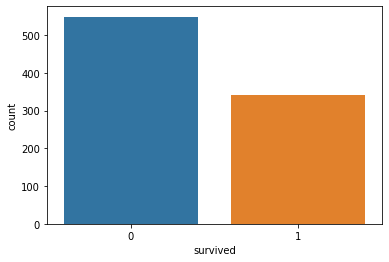

   pclass      Ratio
3     491  55.106622
1     216  24.242424
2     184  20.650954
#################################################################


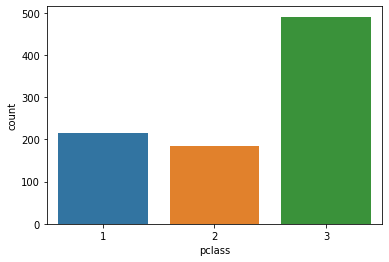

   sibsp      Ratio
0    608  68.237935
1    209  23.456790
2     28   3.142536
4     18   2.020202
3     16   1.795735
8      7   0.785634
5      5   0.561167
#################################################################


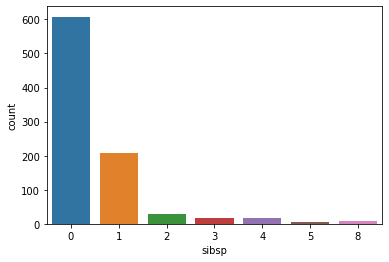

   parch      Ratio
0    678  76.094276
1    118  13.243547
2     80   8.978676
5      5   0.561167
3      5   0.561167
4      4   0.448934
6      1   0.112233
#################################################################


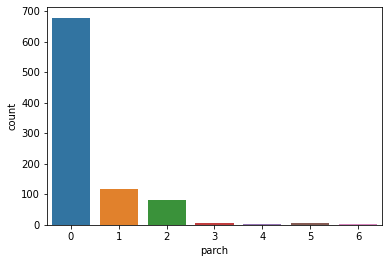

In [ ]:
#grafiği hepsine uygulayalım
for col in cat_cols:
  if df[col].dtypes == "bool":
    print(col)
  else:
   cat_summary(df, col, plot=True)

        sex      Ratio
male    577  64.758698
female  314  35.241302
#################################################################


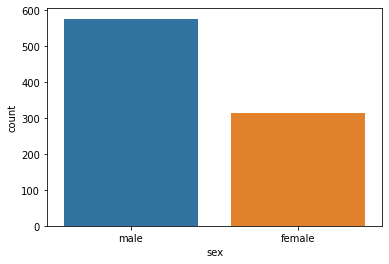

   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
#################################################################


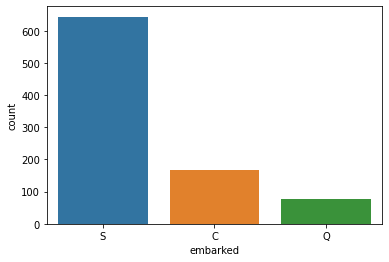

        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
#################################################################


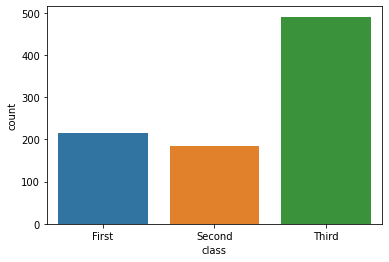

       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
#################################################################


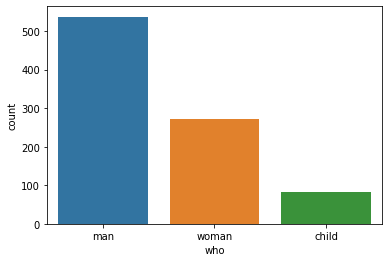

   adult_male     Ratio
1         537  60.26936
0         354  39.73064
#################################################################


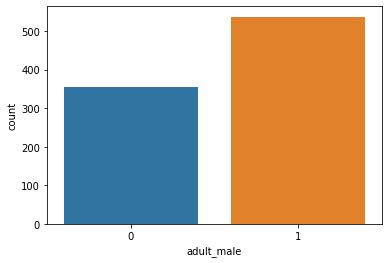

   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
#################################################################


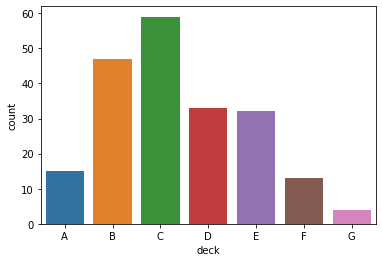

             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
#################################################################


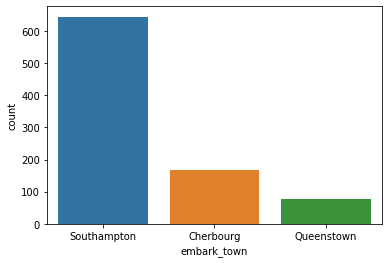

     alive      Ratio
no     549  61.616162
yes    342  38.383838
#################################################################


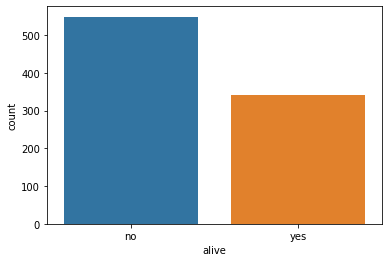

   alone     Ratio
1    537  60.26936
0    354  39.73064
#################################################################


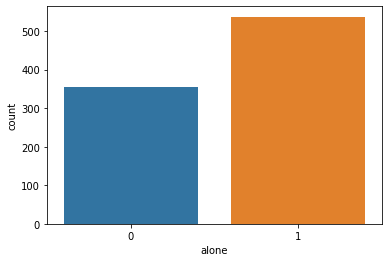

   survived      Ratio
0       549  61.616162
1       342  38.383838
#################################################################


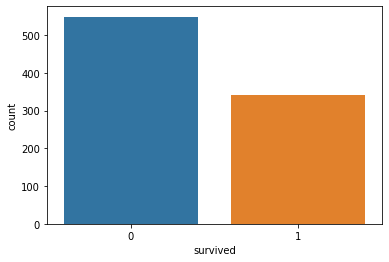

   pclass      Ratio
3     491  55.106622
1     216  24.242424
2     184  20.650954
#################################################################


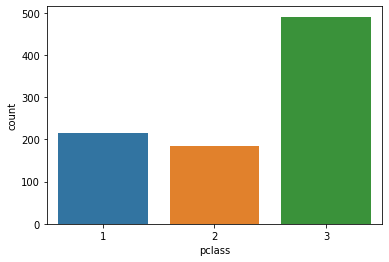

   sibsp      Ratio
0    608  68.237935
1    209  23.456790
2     28   3.142536
4     18   2.020202
3     16   1.795735
8      7   0.785634
5      5   0.561167
#################################################################


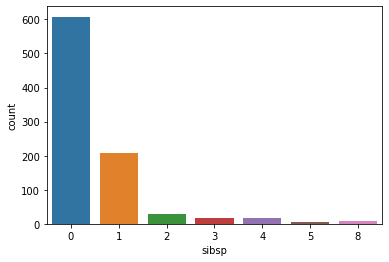

   parch      Ratio
0    678  76.094276
1    118  13.243547
2     80   8.978676
5      5   0.561167
3      5   0.561167
4      4   0.448934
6      1   0.112233
#################################################################


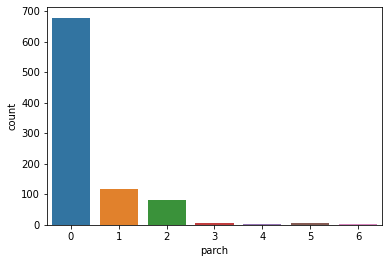

   survived      Ratio
0       549  61.616162
1       342  38.383838
#################################################################


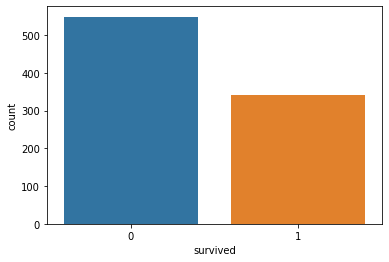

   pclass      Ratio
3     491  55.106622
1     216  24.242424
2     184  20.650954
#################################################################


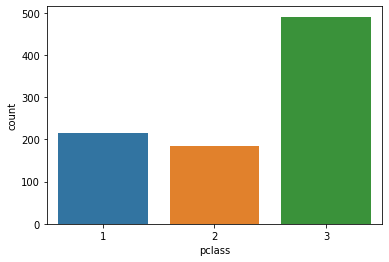

   sibsp      Ratio
0    608  68.237935
1    209  23.456790
2     28   3.142536
4     18   2.020202
3     16   1.795735
8      7   0.785634
5      5   0.561167
#################################################################


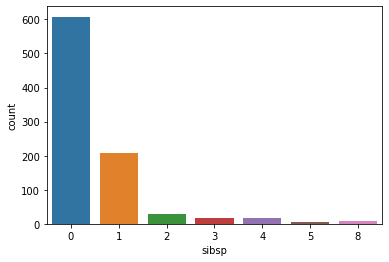

   parch      Ratio
0    678  76.094276
1    118  13.243547
2     80   8.978676
5      5   0.561167
3      5   0.561167
4      4   0.448934
6      1   0.112233
#################################################################


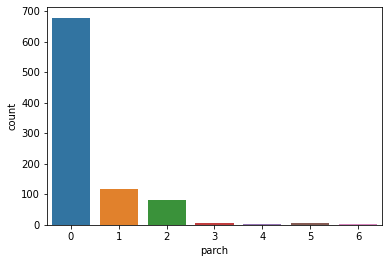

In [ ]:
#bool tipli veriyi int e dönüştürüp grafik isteyelim
for col in cat_cols:
  if df[col].dtypes == "bool":
    df[col] = df[col].astype(int)
    cat_summary(df, col, plot=True)
  else:
    cat_summary(df, col, plot=True)

In [ ]:
#sayısal değişken analizi
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
df = sns.load_dataset("titanic")
df.head()

df[["age","fare"]].describe().T#özet istatistikler
#"age","fare" sayısal değişken olduğunu biliyorum nümerik değişkenleri veri setinden nasıl çekerim
num_cols = [col for col in df.columns if df[col].dtypes in ["int", "float"]]
#sayısal gibi gözüken ama nümerik olanları cat_colsla bulmuştuk bunları ayıklayalım
num_cols = [col for col in num_cols if col not in cat_cols]
num_cols#ayıklayınca 'age', 'fare' gerçek nümerik değişken olarak kaldı

['age', 'fare']

In [ ]:
#analiz fonksiyonu yazalım
#görevi dataframe in discrabe ını alsın
#describe ı detaylandıralım çeyreklik değerlerini biçimlendirmek isteyelim
def num_summary(dataframe, numerical_col):
  quantiles = [0.05,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,0.95,0.99]
  print(dataframe[numerical_col].describe(quantiles).T)
num_summary(df, "age")
#işlemi tüm nümerik değişkenler için yapsın (age, fare)
for col in num_cols:
  num_summary(df, col)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: age, dtype: float64
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: age, dtype: float64
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
5%         7.225000
10%        7.550000
20%        7.854200
30%        8.050000
40%       10.500000
50%       14.454200
60%       21.679200
70%       27.000000
80%       39.687500
90%     

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: age, dtype: float64


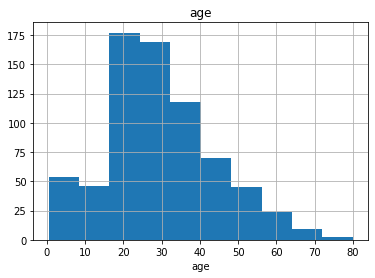

In [ ]:
#fonksiyona grafik ekleyelim
def num_summary(dataframe, numerical_col, plot=False):
  quantiles = [0.05,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,0.95,0.99]
  print(dataframe[numerical_col].describe(quantiles).T)

  if plot:
    dataframe[numerical_col].hist()
    plt.xlabel(numerical_col)
    plt.title(numerical_col)
    plt.show(block=True)
num_summary(df, "age", plot=True)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: age, dtype: float64


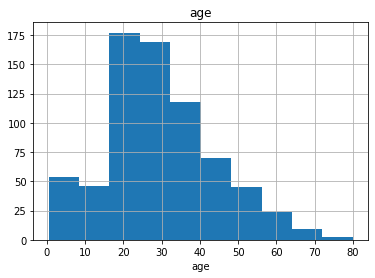

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
5%         7.225000
10%        7.550000
20%        7.854200
30%        8.050000
40%       10.500000
50%       14.454200
60%       21.679200
70%       27.000000
80%       39.687500
90%       77.958300
95%      112.079150
99%      249.006220
max      512.329200
Name: fare, dtype: float64


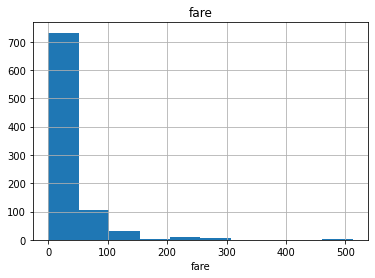

In [ ]:
#tüm nümerik değişkenlere grafik uygulansın
for col in  num_cols:
  num_summary(df, col, plot=True)

In [ ]:
#değişkenlerin yakalanması ve işlemlerin genelleştirilmesi
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
df = sns.load_dataset("titanic")
# df.head()
# df.info()

#öyle bir işlem yapıcaz ki kategorik değişkenler ve nümerik değişkenleri ve kategorik but kardinel değişkenleri eğer varsa  bize ayrı ayrı getirsin
def grab_col_names(dataframe, cat_th=10, car_th=20):
  #cat_cols, cat_bat_car
  cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category","object", "bool"]]
  num_bat_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtype in ["int", "float"]]
  cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtype) in ["category", "object"]]
  cat_cols = cat_cols + num_bat_cat
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  num_cols = [col for col in df.columns if df[col].dtypes in ["int", "float"]]
  num_cols = [col for col in num_cols if col not in cat_cols]
  #raporlama
  print(f"Observations: {dataframe.shape[0]}")
  print(f"Variables: {dataframe.shape[1]}")
  print(f"cat_cols: {len(cat_cols)}")
  print(f"num_cols: {len(num_cols)}")
  print(f"cat_but_car: {len(cat_but_car)}")
  print(f"num_bat_cat: {len(num_bat_cat)}")

  return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)#ÇIKTI:
#Observations: 891
# Variables: 15
# cat_cols: 13
# num_cols: 2
# cat_but_car: 0
# num_bat_cat: 4

Observations: 891
Variables: 15
cat_cols: 13
num_cols: 2
cat_but_car: 0
num_bat_cat: 4


In [ ]:
#Hedef Değişken Analizi
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
df = sns.load_dataset("titanic")
#veri setinin içindeki bool tipli değişkenleri integer a çevirelim
for col in df.columns:
    if df[col].dtypes == "bool":
        df[col] = df[col].astype(int)
def grab_col_names(dataframe, cat_th=10, car_th=20):
  cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category","object", "bool"]]
  num_bat_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtype in ["int", "float"]]
  cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtype) in ["category", "object"]]
  cat_cols = cat_cols + num_bat_cat
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  num_cols = [col for col in df.columns if df[col].dtypes in ["int", "float"]]
  num_cols = [col for col in num_cols if col not in cat_cols]
  #raporlama
  print(f"Observations: {dataframe.shape[0]}")
  print(f"Variables: {dataframe.shape[1]}")
  print(f"cat_cols: {len(cat_cols)}")
  print(f"num_cols: {len(num_cols)}")
  print(f"cat_but_car: {len(cat_but_car)}")
  print(f"num_bat_cat: {len(num_bat_cat)}")

  return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)
df.head()

Observations: 891
Variables: 15
cat_cols: 13
num_cols: 2
cat_but_car: 0
num_bat_cat: 6


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,1,NaN,Southampton,no,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,0,C,Cherbourg,yes,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,0,NaN,Southampton,yes,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,0,C,Southampton,yes,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,1,NaN,Southampton,no,1


In [ ]:
#hedef değişkenin kategorik değişkenler ile analizi
df.groupby("sex")["survived"].mean()
target="survived"#?????
def target_sumary_with_cat(dataframe, categorical_col):
  print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}))

target_sumary_with_cat(df, "survived")

          TARGET_MEAN
survived             
0                 0.0
1                 1.0


In [ ]:
df.groupby("survived")["age"].mean()

survived
0    30.626179
1    28.343690
Name: age, dtype: float64

In [ ]:
#korelasyon analizi
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
df = sns.load_dataset("")

In [ ]:
def calc(wage, hour):
  print(wage*hour)

calc(10, 40)-200

400


TypeError: ignored

In [ ]:
students = ["Denise", "Arsen", "Tony", "Audrey"]

low = lambda x: x[0].lower()

print(list(map(low,students)))

['d', 'a', 't', 'a']


In [ ]:
names = {"Denise":"French", "Jean":"French", "John":"American", "Sarah":"American"}
new_names=["FR_" + name if names[name]=="French" else "US_" + name for name in names.keys()]
new_names

['FR_Denise', 'FR_Jean', 'US_John', 'US_Sarah']

In [ ]:
import numpy as np
from functools import reduce
num_list = np.arange(10)

filter_list = list(filter(lambda x: x % 3 == 0, num_list))
final_list = reduce(lambda x, y : x * y, filter_list)
final_list

0

AttributeError: ignored

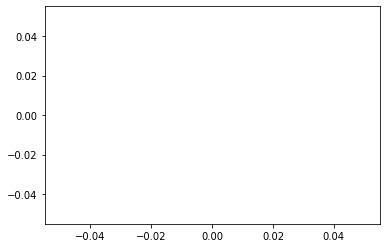

In [ ]:
plt.plot().show()

In [ ]:
import seaborn as sns
df = sns.load_dataset("titanic")
df[["sex","survived"]].groupby("sex")

<AxesSubplot:>

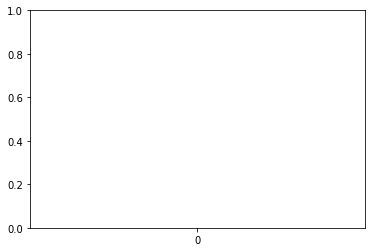

In [ ]:
sns.violinplot()

In [ ]:
number = input()


type(6)

>?6


int

In [ ]:
1 6 13  15 16

In [ ]:
def sqr_root(x):
  """calculate the square root of x"""
  sqr_r = x**(1/2)

sqr_root(16)

In [ ]:
import numpy as np
serie = np.arange(1,10)
x=[3,4,5]
serie[x]

array([4, 5, 6])